# 1 Data wrangling<a id='2_Data_wrangling'></a>

## 1.1 Introduction<a id='2.2_Introduction'></a>

This dataset consist of several CSV files that contain number of geometric features of thousands of channel holes fabricated at nano-meter dimensions on a semconductor substrate. The data has tow parts 
1. Original features i.e. the geometric features are measured from image data that are unprocessed, 
2. Enhanced features i.e. geometric features are collected from processed images. 

Each part is subdivided further as 
1. features of a geometric fitted elliptical shape to the channel hole and 
2. features of the original shape.

Each image (of the same region) is acquired three times and the variation in geometric measurements of the same channel hole in three different images provide a measurement precision.
The customer wants to know the best protocol to achive optimal precision. There are four possibilities.
1. Class 1: Original/unprocessed image features and measurements on actual shape of the channel holes
2. Class 2: Original/unprocessed image features and measurements on fitted elliptical shape to the channel holes
3. Class 3: Enhanced/processed image features and measurement on actual shape of the channel holes
4. Class 4: Enhanced/processed image features and measurements on fitted elliptical shape to the channel holes

In the data-wrangling step we focus on collecting data, organizing it, and making sure it's well defined. Some data cleaning  and data exploration is also done here and described at corresponding steps.

## 1.2 Imports<a id='2.3_Imports'></a>

Placing your imports all together at the start of your notebook means you only need to consult one place to check your notebook's dependencies. By all means import something 'in situ' later on when you're experimenting, but if the imported dependency ends up being kept, you should subsequently move the import statement here with the rest.

In [154]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

## 1.3 Objectives<a id='2.4_Objectives'></a>

* Do you think you may have the data you need to tackle the desired question?

* Do you have any fundamental issues with the data?

## 1.4 Parse The Data: Class 1 <a id='2.5_Load_The_Ski_Resort_Data'></a>

In [155]:
# the supplied CSV data file is the raw_data directory
# get data file names
path =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\original'
# Get the list of all files in directory tree at given path
listOfFolders = [f.path for f in os.scandir(path) if f.is_dir()]

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

files=[]

fx1=[]
fx2=[]
fx3=[]
for fold in listOfFolders:
    for file in glob.glob(fold + r"\csv0_noEllFit\OneDrive*_01_*.csv"):
        fx1.append(file)
    for file in glob.glob(fold + r"\csv0_noEllFit\OneDrive*_02_*.csv"):
        fx2.append(file)
    for file in glob.glob(fold + r"\csv0_noEllFit\OneDrive*_03_*.csv"):
        fx3.append(file)

files.append(fx1)
files.append(fx2)
files.append(fx3)
print(len(fx1))
print(len(fx2))
print(len(fx3))

11
11
11


Good first steps in auditing the data are the info method and displaying the first few records with head.

In [156]:
dfx = [] # data frame of frame of frames

for fx in range (0, len(files)):
    dfl=[]
    for file in files[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfx.append(dfl)

print(len(dfx))
print(len(dfx[0]))
print(len(dfx[0][0]))
##Call the info method to do quick sanity check
dfx[0][0].info()
dfx[1][0].info()
dfx[2][0].info()

dfx[2][0].head()


3
11
1539
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1539 non-null   object 
 1   1       1539 non-null   object 
 2   2       1539 non-null   float64
 3   3       1539 non-null   float64
 4   4       1539 non-null   float64
 5   5       1539 non-null   float64
 6   6       1539 non-null   float64
 7   7       1539 non-null   float64
 8   8       1539 non-null   float64
 9   9       1539 non-null   float64
 10  10      1539 non-null   float64
 11  11      1539 non-null   float64
 12  12      1539 non-null   float64
 13  13      1539 non-null   float64
 14  14      1539 non-null   float64
 15  15      1539 non-null   float64
dtypes: float64(14), object(2)
memory usage: 192.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  -----

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2390_374,3.574118e-16,4.636496e-16,7.193437e-08,8.544922e-08,4.461613e-16,1.456904e-15,4.534274e-16,0.867174,110.109604,0.974129,5.895996e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2198_378,2.340153e-16,3.190786e-16,5.713994e-08,6.665039e-08,2.803704e-16,1.002762e-15,2.774596e-16,0.924549,99.283493,0.984639,5.810547e-08,5.639648e-08,5.810547e-08,5.725098e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2814_444,4.216656e-16,5.366653e-16,7.877031e-08,9.228516e-08,4.910349e-16,1.718520e-15,5.315543e-16,0.940009,88.810051,0.967337,5.468750e-08,5.895996e-08,5.810547e-08,6.237793e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1042_450,4.632846e-16,5.833954e-16,8.189506e-08,9.741211e-08,5.242769e-16,1.901510e-15,5.844175e-16,0.960563,71.478729,0.973906,5.725098e-08,6.066895e-08,5.810547e-08,5.981445e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1876_452,4.505068e-16,5.673319e-16,7.997874e-08,9.399414e-08,5.181807e-16,1.874791e-15,5.519986e-16,0.973179,45.448242,0.973954,5.639648e-08,5.981445e-08,5.810547e-08,5.981445e-08


OK. This shows the number of entries in each of the triplets is not the same. We cannot calculate the standard deviation of the feature measurement for the same hole in the triplets (three measurements for each channel hole is made using three images) if we do not know which holes have missing measurements.

Column 1 in each file provides X_Y location of the channel hole. Ideally this X_Y location should be the same for all three channel holes that are considered triplicate data of the same channel hole. Unfortunately due to process issues it is no so (imaging stage drifts over time). Fortunately this drift is very small and it is possible to find the triplicate measurements of the same channel hole by finding the distance between X_Y locations and constrining it to be within certain distance. 

This process will also remove those channel holes with missing information (i.e. no triplicate measurements) from the further analysis process.

In [157]:
dfx[0][0].head()
#dfx[1][0][0].head()
#dfx[2][0][0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2406_408,3.625229e-16,4.687607e-16,7.193437e-08,8.544922e-08,4.547634e-16,1.483433e-15,4.534274e-16,0.878787,101.936035,0.978325,5.981445e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2314_408,3.979355e-16,5.089194e-16,7.585289e-08,8.886719e-08,5.189917e-16,1.636060e-15,4.870147e-16,0.815638,94.485428,0.974084,5.810547e-08,5.895996e-08,5.810547e-08,5.981445e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2216_412,2.278090e-16,3.125072e-16,5.663939e-08,6.665039e-08,2.659693e-16,9.692724e-16,2.774596e-16,0.931644,79.474884,0.979592,5.810547e-08,5.554199e-08,5.810547e-08,5.810547e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2826_480,4.307926e-16,5.454272e-16,7.826976e-08,9.228516e-08,4.874511e-16,1.774125e-15,5.315543e-16,0.948516,83.301819,0.977630,5.639648e-08,5.895996e-08,5.810547e-08,5.895996e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1056_484,4.786179e-16,5.994588e-16,8.289616e-08,9.741211e-08,5.734712e-16,1.979251e-15,5.928874e-16,0.931859,38.257317,0.974721,5.981445e-08,6.066895e-08,5.810547e-08,5.810547e-08


OK, we do not have plausible column headings in the CSV files. So we must read the headings description file and provide column headings for further analysis

In [158]:
# Read header descriptor file
header_descriptor = r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\header.csv'
df = pd.read_csv(header_descriptor)
dfl= df.columns.tolist()
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].columns=dfl
        dfx[1][0].columns=dfl
        dfx[2][0].columns=dfl

# look at the column headings and make sure they are correct
dfx[0][0].head()


,file_name,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2406_408,3.625229e-16,4.687607e-16,7.193437e-08,8.544922e-08,4.547634e-16,1.483433e-15,4.534274e-16,0.878787,101.936035,0.978325,5.981445e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2314_408,3.979355e-16,5.089194e-16,7.585289e-08,8.886719e-08,5.189917e-16,1.636060e-15,4.870147e-16,0.815638,94.485428,0.974084,5.810547e-08,5.895996e-08,5.810547e-08,5.981445e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2216_412,2.278090e-16,3.125072e-16,5.663939e-08,6.665039e-08,2.659693e-16,9.692724e-16,2.774596e-16,0.931644,79.474884,0.979592,5.810547e-08,5.554199e-08,5.810547e-08,5.810547e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2826_480,4.307926e-16,5.454272e-16,7.826976e-08,9.228516e-08,4.874511e-16,1.774125e-15,5.315543e-16,0.948516,83.301819,0.977630,5.639648e-08,5.895996e-08,5.810547e-08,5.895996e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1056_484,4.786179e-16,5.994588e-16,8.289616e-08,9.741211e-08,5.734712e-16,1.979251e-15,5.928874e-16,0.931859,38.257317,0.974721,5.981445e-08,6.066895e-08,5.810547e-08,5.810547e-08


## 1.5 Provide index label for rows based on location and correspondance in triplets <a id='2.6_Explore_The_Data'></a>

### 1.5.1 Create a primary index label column in the first dataframe of the triplets <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

This means, we force sequential labeling in dfx[0][*] dataframe as that is considered primary file/frame and match dfx[1][*] and dfx[2][*] columns to the primary frame. All the rows that are not represented by three measurements are discarded.

In [159]:
for f in range(0, len(dfx[0])):
    label_hole=[]
    for i in range(0, len(dfx[0][f])):
        label_hole.append(str(i+1))
    lb = pd.Series(label_hole)
    dfx[0][f].insert(1, "label", lb)
    
dfx[0][0].head()
#dfx[0][1].head()
#dfx[0][2].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1,520_408,3.753007e-16,4.819036e-16,7.243492e-08,8.544922e-08,4.261248e-16,1.546867e-15,4.556179e-16,0.958101,70.295807,0.980916,5.639648e-08,5.725098e-08,5.810547e-08,5.810547e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2,1542_408,5.490780e-16,6.775856e-16,8.823045e-08,1.042480e-07,6.215287e-16,2.235041e-15,6.775856e-16,0.918767,88.437439,0.977258,5.810547e-08,6.066895e-08,5.810547e-08,5.981445e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,3,1822_406,3.760308e-16,4.833639e-16,7.343602e-08,8.544922e-08,4.371143e-16,1.552986e-15,4.556179e-16,0.952964,108.097580,0.976303,5.639648e-08,5.895996e-08,5.810547e-08,5.895996e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,4,2936_408,4.176498e-16,5.322844e-16,7.826976e-08,9.228516e-08,5.161244e-16,1.730457e-15,5.111099e-16,0.889308,67.035324,0.969492,5.725098e-08,5.810547e-08,5.810547e-08,5.810547e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,5,3582_408,5.005226e-16,6.250143e-16,8.531303e-08,1.008301e-07,5.864469e-16,2.028111e-15,6.337763e-16,0.929411,69.503349,0.973031,5.895996e-08,6.066895e-08,5.810547e-08,5.810547e-08


### 1.5.2 Label corresponding rows in other triplicate files<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

The three triplicate files are suppose to have same number of rows indicating that these three files together have three measurements for each channel hole structure.
When we look athe number of rows in each of the tripicate files, they are not same. For example
dfx[0][0] has 1539 rows
dfx[1][0] has 1552 rows
dfx[2][0] has 1553 rows
In addition, there is no guarantee that 1539 rows in dfx[0][0] are all represented in dfx[1][0] and dfx[2][0]

Known information: Column location(X_Y) gives the (x, y) coordinates of the approximate center of the holes.
We know that these holes have not drifted more than a "certain" distance due to stage drift
So, we should calculate the distance of every hole (say nearby few (~20) holes are OK as the CSV files are some what ordered in raster scan type) in dfx[0][0] from dfx[1][0] and dfx[2][0]. The nearest hole in dfx[1][0] and dfx[2][0] that is within "certain" distance will then be given same label as in dfx[0][0]

### 1.5.3 Identify missing data<a id='2.6.3_Categorical_Features'></a>

If the label is not present in all the files of the triplicate, then that row (channel hole) is considered missing crucial data for precision calculation and the corresponding label (and features) are not analyzed further.

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


You saw earlier on that these three columns had no missing values. But are there any other issues with these columns? Sensible questions to ask here include:

* Is `Name` (or at least a combination of Name/Region/State) unique?
* Is `Region` always the same as `state`?

#### 2.6.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [8]:
#Code task 7#
#Use pandas' Series method `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()

Crystal Mountain          2
Snow Creek                1
Winterplace Ski Resort    1
Big Boulder               1
Holiday Valley            1
Name: Name, dtype: int64

You have a duplicated resort name: Crystal Mountain.

**Q: 1** Is this resort duplicated if you take into account Region and/or state as well?

In [9]:
#Code task 8#
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data["Name"] + ', ' + ski_data["Region"]).value_counts().head()

Bryce Resort, Virginia                         1
Nubs Nob Ski Area, Michigan                    1
Donner Ski Ranch, Sierra Nevada                1
Elm Creek Winter Recreation Area, Minnesota    1
Yawgoo Valley, Rhode Island                    1
dtype: int64

In [10]:
#Code task 9#
#Concatenate 'Name' and 'state' and count the values again (as above)
(ski_data["Name"] + ', ' + ski_data["state"]).value_counts().head()

Bryce Resort, Virginia                         1
Big Mountain Resort, Montana                   1
Monarch Mountain, Colorado                     1
Elm Creek Winter Recreation Area, Minnesota    1
Sugar Bowl Resort, California                  1
dtype: int64

In [11]:
**NB** because you know `value_counts()` sorts descending, you can use the `head()` method and know the rest of the counts must be 1.

SyntaxError: invalid syntax (<ipython-input-11-8a6568d3dafb>, line 1)

**A: 1** Your answer here

In [ ]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

So there are two Crystal Mountain resorts, but they are clearly two different resorts in two different states. This is a powerful signal that you have unique records on each row.

#### 2.6.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

What's the relationship between region and state?

You know they are the same in many cases (e.g. both the Region and the state are given as 'Michigan'). In how many cases do they differ?

In [ ]:
#Code task 10#
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).count()

You know what a state is. What is a region? You can tabulate the distinct values along with their respective frequencies using `value_counts()`.

In [ ]:
ski_data['Region'].value_counts()

A casual inspection by eye reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. Tabulate the differences between Region and state. On a note regarding scaling to larger data sets, you might wonder how you could spot such cases when presented with millions of rows. This is an interesting point. Imagine you have access to a database with a Region and state column in a table and there are millions of rows. You wouldn't eyeball all the rows looking for differences! Bear in mind that our first interest lies in establishing the answer to the question "Are they always the same?" One approach might be to ask the database to return records where they differ, but limit the output to 10 rows. If there were differences, you'd only get up to 10 results, and so you wouldn't know whether you'd located all differences, but you'd know that there were 'a nonzero number' of differences. If you got an empty result set back, then you would know that the two columns always had the same value. At the risk of digressing, some values in one column only might be NULL (missing) and different databases treat NULL differently, so be aware that on many an occasion a seamingly 'simple' question gets very interesting to answer very quickly!

In [ ]:
#Code task 11#
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,
#group that by 'state' and perform `value_counts` on the 'Region'
(ski_data[ski_data.Region != ski_data.state]
 .groupby('state')['Region']
 .value_counts())


The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

#### 2.6.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [ ]:
#Code task 12#
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each

ski_data[["Region","state"]].nunique()

In [ ]:
print(ski_data)

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

If this is your first time using [matplotlib](https://matplotlib.org/3.2.2/index.html)'s [subplots](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html), you may find the online documentation useful.

In [ ]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind="barh", ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title("Region")
#Label the xaxis 'Count'
ax[0].set_xlabel("Count")
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind="barh", ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title("state")
#Label the xaxis 'Count'
ax[1].set_xlabel("Count")
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

How's your geography? Looking at the distribution of States, you see New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 13th place. You should think carefully about how, or whether, you use this information. Does New York command a premium because of its proximity to population? Even if a resort's State were a useful predictor of ticket price, your main interest lies in Montana. Would you want a model that is skewed for accuracy by New York? Should you just filter for Montana and create a Montana-specific model? This would slash your available data volume. Your problem task includes the contextual insight that the data are for resorts all belonging to the same market share. This suggests one might expect prices to be similar amongst them. You can look into this. A boxplot grouped by State is an ideal way to quickly compare prices. Another side note worth bringing up here is that, in reality, the best approach here definitely would include consulting with the client or other domain expert. They might know of good reasons for treating states equivalently or differently. The data scientist is rarely the final arbiter of such a decision. But here, you'll see if we can find any supporting evidence for treating states the same or differently.

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

Our primary focus is our Big Mountain resort, in Montana. Does the state give you any clues to help decide what your primary target response feature should be (weekend or weekday ticket prices)?

##### 2.6.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [19]:
#Code task 14#
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby("state")[["AdultWeekday", "AdultWeekend"]].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


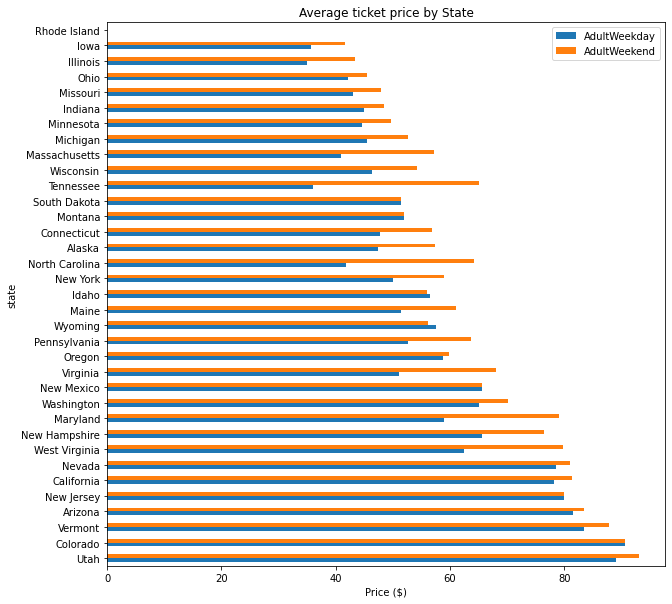

In [20]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states?

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Next, you can transform the data into a single column for price with a new categorical column that represents the ticket type.

In [21]:
#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument

ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday','AdultWeekend']], 
                        id_vars=['state'], 
                        var_name= 'Ticket', 
                        value_vars=['AdultWeekday','AdultWeekend'], 
                        value_name='Price')

In [22]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


This is now in a format we can pass to [seaborn](https://seaborn.pydata.org/)'s [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to create boxplots of the ticket price distributions for each ticket type for each state.

In [25]:
type(ticket_prices)

pandas.core.frame.DataFrame

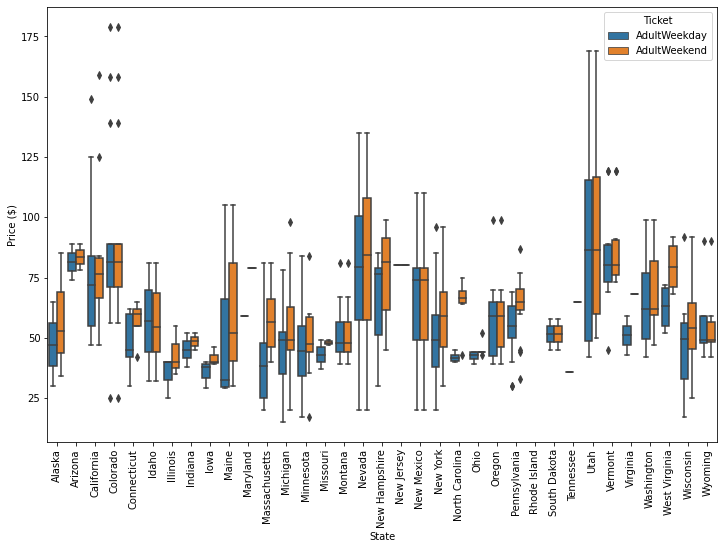

In [24]:
#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.

plt.subplots(figsize=(12, 8))
sns.boxplot(x="state", y="Price", hue="Ticket", data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. Some States, notably North Carolina and Virginia, have weekend prices far higher than weekday prices. You could be inspired from this exploration to consider a few potential groupings of resorts, those with low spread, those with lower averages, and those that charge a premium for weekend tickets. However, you're told that you are taking all resorts to be part of the same market share, you  could argue against further segment the resorts. Nevertheless, ways to consider using the State information in your modelling include:

* disregard State completely
* retain all State information
* retain State in the form of Montana vs not Montana, as our target resort is in Montana

You've also noted another effect above: some States show a marked difference between weekday and weekend ticket prices. It may make sense to allow a model to take into account not just State but also weekend vs weekday.

Thus we currently have two main questions you want to resolve:

* What do you do about the two types of ticket price?
* What do you do about the state information?

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

In [ ]:
Having decided to reserve judgement on how exactly you utilize the State, turn your attention to cleaning the numeric features.

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [ ]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
ski_data.describe().T

Recall you're missing the ticket prices for some 16% of resorts. This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have.

In [ ]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. You will definitely want to drop the records for which you have no price information, however you will not do so just yet. There may still be useful information about the distributions of other features in that 14% of the data.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

In [ ]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

In [ ]:
#Code task 19#
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data[ski_data["SkiableTerrain_ac"]>10000]

**Q: 2** One resort has an incredibly large skiable terrain area! Which is it?

In [ ]:
#Code task 20#
#Now you know there's only one, print the whole row to investigate all values, including seeing the resort name
#Hint: don't forget the transpose will be helpful here
ski_data[ski_data["SkiableTerrain_ac"] > 10000].T

**A: 2** Your answer here

But what can you do when you have one record that seems highly suspicious?

You can see if your data are correct. Search for "silverton mountain skiable area". If you do this, you get some [useful information](https://www.google.com/search?q=silverton+mountain+skiable+area).

![Silverton Mountain information](images/silverton_mountain_info.png)

You can spot check data. You see your top and base elevation values agree, but the skiable area is very different. Your suspect value is 26819, but the value you've just looked up is 1819. The last three digits agree. This sort of error could have occured in transmission or some editing or transcription stage. You could plausibly replace the suspect value with the one you've just obtained. Another cautionary note to make here is that although you're doing this in order to progress with your analysis, this is most definitely an issue that should have been raised and fed back to the client or data originator as a query. You should view this "data correction" step as a means to continue (documenting it carefully as you do in this notebook) rather than an ultimate decision as to what is correct.

In [ ]:
#Code task 21#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

In [ ]:
#Code task 22#
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [ ]:
#Code task 23#
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

**NB whilst you may become suspicious about your data quality, and you know you have missing values, you will not here dive down the rabbit hole of checking all values or web scraping to replace missing values.**

What does the distribution of skiable area look like now?

In [ ]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

You now see a rather long tailed distribution. You may wonder about the now most extreme value that is above 8000, but similarly you may also wonder about the value around 7000. If you wanted to spend more time manually checking values you could, but leave this for now. The above distribution is plausible.

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

In [ ]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

In [ ]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

You can adopt a similar approach as for the suspect skiable area value and do some spot checking. To save time, here is a link to the website for [Heavenly Mountain Resort](https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx). From this you can glean that you have values for skiable terrain that agree. Furthermore, you can read that snowmaking covers 60% of the trails.

What, then, is your rough guess for the area covered by snowmaking?

In [ ]:
.6 * 4800

This is less than the value of 3379 in your data so you may have a judgement call to make. However, notice something else. You have no ticket pricing information at all for this resort. Any further effort spent worrying about values for this resort will be wasted. You'll simply be dropping the entire row!

##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [ ]:
ski_data.fastEight.value_counts()

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [ ]:
#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns="fastEight", inplace=True)

What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [ ]:
#Code task 25#
#Filter the 'yearsOpen' column for values greater than 100
ski_data[ski_data["yearsOpen"] > 100]

Okay, one seems to have been open for 104 years. But beyond that, one is down as having been open for 2019 years. This is wrong! What shall you do about this?

What does the distribution of yearsOpen look like if you exclude just the obviously wrong one?

In [ ]:
#Code task 26#
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values


ski_data['yearsOpen'].loc[ski_data.yearsOpen < 100].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The above distribution of years seems entirely plausible, including the 104 year value. You can certainly state that no resort will have been open for 2019 years! It likely means the resort opened in 2019. It could also mean the resort is due to open in 2019. You don't know when these data were gathered!

Let's review the summary statistics for the years under 1000.

In [ ]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

The smallest number of years open otherwise is 6. You can't be sure whether this resort in question has been open zero years or one year and even whether the numbers are projections or actual. In any case, you would be adding a new youngest resort so it feels best to simply drop this row.

In [ ]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

The other features you had mild concern over, you will not investigate further. Perhaps take some care when using these features.

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

You have, by this point removed one row, but it was for a resort that may not have opened yet, or perhaps in its first season. Using your business knowledge, you know that state-wide supply and demand of certain skiing resources may well factor into pricing strategies. Does a resort dominate the available night skiing in a state? Or does it account for a large proportion of the total skiable terrain or days open?

If you want to add any features to your data that captures the state-wide market size, you should do this now, before dropping any more rows. In the next section, you'll drop rows with missing price information. Although you don't know what those resorts charge for their tickets, you do know the resorts exists and have been open for at least six years. Thus, you'll now calculate some state-wide summary statistics for later use.

Many features in your data pertain to chairlifts, that is for getting people around each resort. These aren't relevant, nor are the features relating to altitudes. Features that you may be interested in are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

When you think about it, these are features it makes sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. You might consider the total number of ski runs, but understand that the skiable area is more informative than just a number of runs.

A fairly new groupby behaviour is [named aggregation](https://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.25.0.html). This allows us to clearly perform the aggregations you want whilst also creating informative output column names.

In [ ]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column="daysOpenLastYear", aggfunc='sum'),
    state_terrain_parks=pd.NamedAgg(column="TerrainParks", aggfunc="sum"),
    state_total_nightskiing_ac=pd.NamedAgg(column="NightSkiing_ac", aggfunc="sum")).reset_index()
state_summary.head()

## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

You know there are two columns that refer to price: 'AdultWeekend' and 'AdultWeekday'. You can calculate the number of price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing and 2 denotes that both are missing.

In [ ]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

About 14% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [ ]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[ missing_price != 2]

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

In [ ]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

These distributions are much better. There are clearly some skewed distributions, so keep an eye on `fastQuads`, `fastSixes`, and perhaps `trams`. These lack much variance away from 0 and may have a small number of relatively extreme values.  Models failing to rate a feature as important when domain knowledge tells you it should be is an issue to look out for, as is a model being overly influenced by some extreme values. If you build a good machine learning pipeline, hopefully it will be robust to such issues, but you may also wish to consider nonlinear transformations of features.

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). Listen, you should have a healthy concern about using data you "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows you to easily pull and incorporate an external data set. It also allows you to proceed with an analysis that includes state sizes and populations for your 'first cut' model. Be explicit about your source (we documented it here in this workflow) and ensure it is open to inspection. All steps are subject to review, and it may be that a client has a specific source of data they trust that you should use to rerun the analysis.

In [ ]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [ ]:
type(usa_states)

In [ ]:
len(usa_states)

In [ ]:
usa_states = usa_states[0]
usa_states.head()

Note, in even the last year, the capability of `pd.read_html()` has improved. The merged cells you see in the web table are now handled much more conveniently, with 'Phoenix' now being duplicated so the subsequent columns remain aligned. But check this anyway. If you extract the established date column, you should just get dates. Recall previously you used the `.loc` accessor, because you were using labels. Now you want to refer to a column by its index position and so use `.iloc`. For a discussion on the difference use cases of `.loc` and `.iloc` refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [ ]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [ ]:
established

Extract the state name, population, and total area (square miles) columns.

In [ ]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0, 5, 6]].copy()
usa_states_sub.columns = ["state", "state_population", "state_area_sq_miles"]
usa_states_sub.head()

Do you have all the ski data states accounted for?

In [ ]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`; 
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_summary["state"]) - set(usa_states_sub.state)
missing_states

No?? 

If you look at the table on the web, you can perhaps start to guess what the problem is. You can confirm your suspicion by pulling out state names that _contain_ 'Massachusetts', 'Pennsylvania', or 'Virginia' from usa_states_sub:

In [ ]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

Delete square brackets and their contents and try again:

In [ ]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace="\[.*\]", value="", regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

In [ ]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
#missing_states = set(state_summary["state"]) - set(usa_states_sub.state)
#missing_states
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

Better! You have an empty set for missing states now. You can confidently add the population and state area columns to the ski resort data.

In [ ]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, how="left", on="state")
state_summary.head()

Having created this data frame of summary statistics for various states, it would seem obvious to join this with the ski resort data to augment it with this additional data. You will do this, but not now. In the next notebook you will be exploring the data, including the relationships between the states. For that you want a separate row for each state, as you have here, and joining the data this soon means you'd need to separate and eliminate redundances in the state data when you wanted it.

## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

Finally, what will your target be when modelling ticket price? What relationship is there between weekday and weekend prices?

In [ ]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot(x="AdultWeekday", y="AdultWeekend", kind="scatter");

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distribution for weekday and weekend prices in Montana seemed equal. Is this confirmed in the actual data for each resort? Big Mountain resort is in Montana, so the relationship between these quantities in this state are particularly relevant.

In [ ]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == "Montana", ["AdultWeekend", "AdultWeekday"]]

Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [ ]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [ ]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [ ]:
ski_data.shape

Perform a final quick check on the data.

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [ ]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

These seem possibly curiously quantized...

In [ ]:
missing['%'].unique()

Yes, the percentage of missing values per row appear in multiples of 4.

In [ ]:
missing['%'].value_counts()

This is almost as if values have been removed artificially... Nevertheless, what you don't know is how useful the missing features are in predicting ticket price. You shouldn't just drop rows that are missing several useless features.

In [ ]:
ski_data.info()

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

## 2.12 Save data<a id='2.12_Save_data'></a>

In [ ]:
ski_data.shape

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [ ]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

In [ ]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

## 2.13 Summary<a id='2.13_Summary'></a>

**Q: 3** Write a summary statement that highlights the key processes and findings from this notebook. This should include information such as the original number of rows in the data, whether our own resort was actually present etc. What columns, if any, have been removed? Any rows? Summarise the reasons why. Were any other issues found? What remedial actions did you take? State where you are in the project. Can you confirm what the target feature is for your desire to predict ticket price? How many rows were left in the data? Hint: this is a great opportunity to reread your notebook, check all cells have been executed in order and from a "blank slate" (restarting the kernel will do this), and that your workflow makes sense and follows a logical pattern. As you do this you can pull out salient information for inclusion in this summary. Thus, this section will provide an important overview of "what" and "why" without having to dive into the "how" or any unproductive or inconclusive steps along the way.

**A: 3** Your answer here

In [ ]:
print("After wrangling with the data, we have 277 rows and 25 columns left.\
By plotting a graph, we can see the relationship between AdultWeekday or AdultWeekend is linear \
(i.e. the higher the value of AdultWeekday, the higher the value of AdultWeekend.) \
Therefore, we can drop one of the prices. Since AdultWeekend has the least missing value of the two, \
we choose to drop the AdultWeekday.")
